### Importación de datos



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

listaTiendas = [tienda, tienda2, tienda3, tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
def sumatoriaIngresos(lista, impresor = True):
    nombreTiendas = ["Tienda " + str(n+1) for n in range(len(lista))]
    sumatoriaVentas = {}
    for Tienda in lista:
            sumatoriaVentas[nombreTiendas[0]] = float(Tienda["Precio"].sum())
            nombreTiendas.append(nombreTiendas.pop(0))
    if impresor:
          for tiendaSumatorio in sumatoriaVentas:
                print("Ingresos de la" , str(tiendaSumatorio) , ":", sumatoriaVentas[tiendaSumatorio])
    else:
        colores = ["#FE7743", "#EFEEEA", "#273F4F", "#000000"]
        plt.bar(x = list(sumatoriaVentas.keys()), height= list(sumatoriaVentas.values()), color= colores)
        plt.xticks(fontsize = 8)
        plt.ylim(1000000000,1200000000)
        plt.ticklabel_format(style='plain', axis='y')
        plt.title("Ganancias por tienda (en colones)", fontsize = 14)
        plt.show()

sumatoriaIngresos(listaTiendas)


Ingresos de la Tienda 1 : 1150880400.0
Ingresos de la Tienda 2 : 1116343500.0
Ingresos de la Tienda 3 : 1098019600.0
Ingresos de la Tienda 4 : 1038375700.0


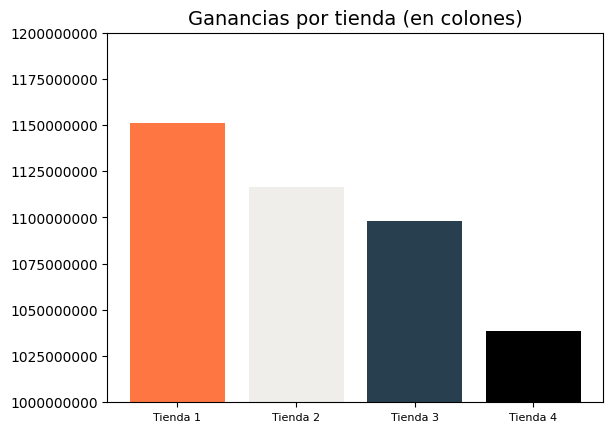

In [3]:
sumatoriaIngresos(listaTiendas, False)

# 2. Ventas por categoría

In [19]:
def contador(nTienda, impresor = True):
    
    dicVentas = {x: 0 for x in nTienda["Categoría del Producto"]} #dicVentas = diccionario con las categorias
    for nObjeto in range(len(nTienda["Precio"])): #nObjeto = posicion
        dicVentas[nTienda["Categoría del Producto"][nObjeto]] += 1 #Para calcular ganancias, cambiar 1 por nTienda["Precio"][nObjeto]
    
    if impresor:
        for categoria in dicVentas:
            print("Ventas de", categoria, "=", float(dicVentas[categoria]))
        ventasPorCategoria = list(dicVentas.values())
        while len(ventasPorCategoria) > 1:
            ventasPorCategoria[0] += ventasPorCategoria.pop()
        print("Ventas totales = " + str(ventasPorCategoria[0]) )
    else:
        return dicVentas

contador(tienda)

Ventas de Electrónicos = 448.0
Ventas de Muebles = 465.0
Ventas de Juguetes = 324.0
Ventas de Electrodomésticos = 312.0
Ventas de Artículos para el hogar = 171.0
Ventas de Deportes y diversión = 284.0
Ventas de Libros = 173.0
Ventas de Instrumentos musicales = 182.0
Ventas totales = 2359


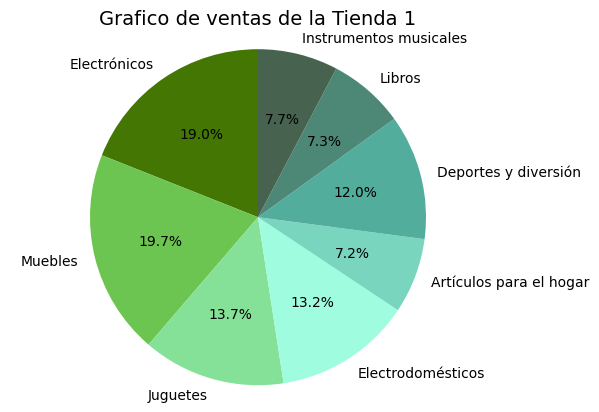

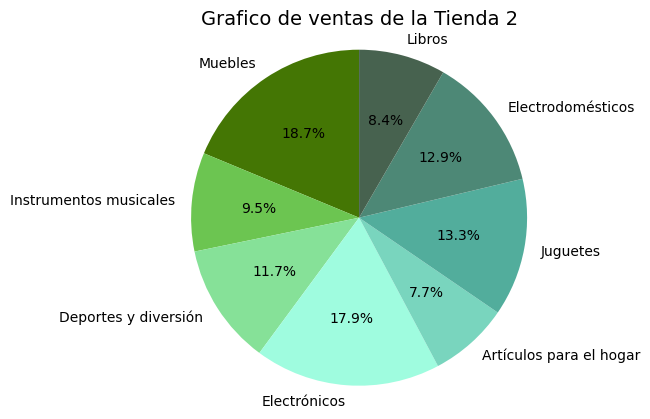

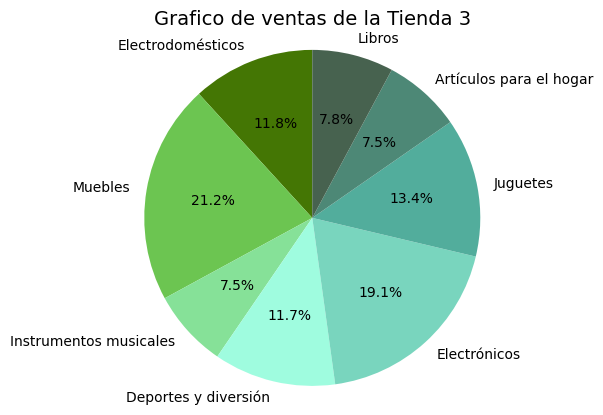

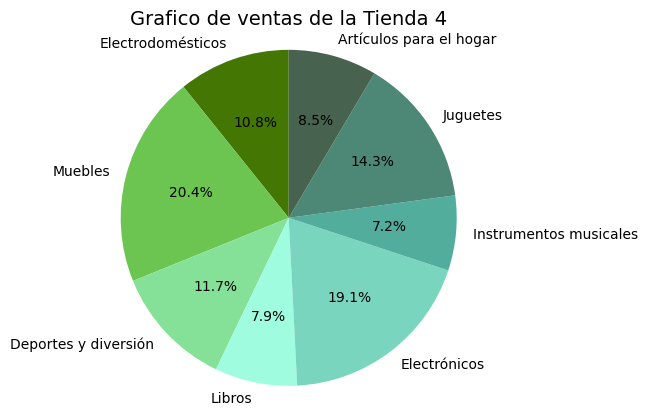

In [24]:
def graficoDeVentas(lista): #^ Ejecutar contador() antes de realizar la creacion de gaficos ^
    nombreTiendas = ["Tienda " + str(n+1) for n in range(len(lista))]
    dicDeTiendas = {}
    for dicTienda in lista:
        dicDeTiendas[nombreTiendas[0]] =  contador(dicTienda, False)
        nombreTiendas.append(nombreTiendas.pop(0))

    for Tienda in nombreTiendas:
        dicVentas = dicDeTiendas[Tienda]
        nombreProductos =[]
        ventasProductos =[]
        for producto in dicVentas: #Separa nombres de productos y cantidad de ventas por producto
            nombreProductos.append(producto)
            ventasProductos.append(dicVentas[producto])
        
        colores = ["#447604", "#6CC551", "#86E198", "#9FFCDF", "#79D5BE", "#52AD9C", "#4D8876", "#47624F"]
        plt.pie(ventasProductos, labels = nombreProductos, colors= colores, autopct="%1.1f%%", startangle= 90)
        plt.axis('equal')
        plt.title("Grafico de ventas de la "+ Tienda , fontsize = 14)
        plt.show()

graficoDeVentas(listaTiendas)

# 3. Calificación promedio de la tienda


In [27]:
promedio = lambda x: float(x.sum()/len(x))

def promedioCalificacion(listaTiendas):
    tiendas = ["Tienda " + str(n+1) for n in range(len(listaTiendas))]
    for nTienda in listaTiendas:
        print("Calificacion promedio de la", tiendas[0], ": ",promedio(nTienda["Calificación"]))
        tiendas.append(tiendas.pop(0))

promedioCalificacion(listaTiendas)

Calificacion promedio de la Tienda 1 :  3.976685036032217
Calificacion promedio de la Tienda 2 :  4.037303942348453
Calificacion promedio de la Tienda 3 :  4.048325561678677
Calificacion promedio de la Tienda 4 :  3.9957591178965224


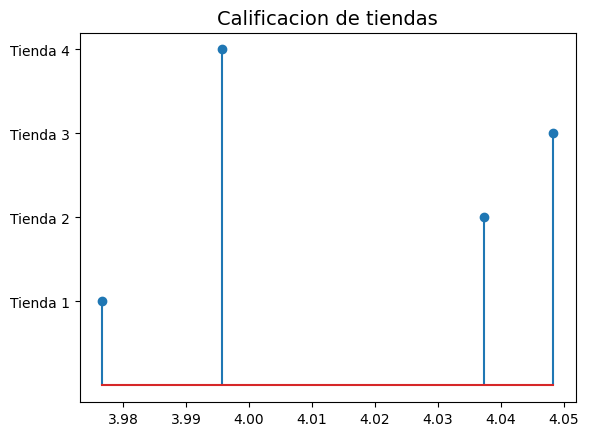

In [28]:
def graficoDeCalificaciones(lista): #^ Ejecurar promedio antes de realizar la creacion de graficos ^ 
    calificacion = [promedio(x["Calificación"]) for x in lista]
    tiendas = ["Tienda " + str(n+1) for n in range(len(lista))]
    y = [x+1 for x in range(len(lista))]
    plt.stem(calificacion, y)

    plt.yticks(y, tiendas)
    plt.title("Calificacion de tiendas", fontsize = 14)
    plt.show()

graficoDeCalificaciones(listaTiendas)

# 4. Productos más y menos vendidos

In [29]:
def calificadorVentas(listaTienda):
    tiendas = ["Tienda " + str(n+1) for n in range(len(listaTienda))]
    for nTienda in listaTienda:
        dicVentas = contador(nTienda, False)
        masVendido = None
        menosVendido = None
        for producto in dicVentas:
            if masVendido is None or dicVentas[producto] > dicVentas[masVendido]:
                masVendido = producto
            else:
                if menosVendido is None or dicVentas[producto] < dicVentas[menosVendido]:
                    menosVendido = producto
                else:
                    continue

        print(masVendido, "fue la categoria mas vendido de la", tiendas[0],", con", dicVentas[masVendido], "ventas.")
        print(menosVendido, "fue la categoria menos vendido de la", tiendas[0] ,", con", dicVentas[menosVendido], "ventas.")
        tiendas.pop(0)

calificadorVentas(listaTiendas)

Muebles fue la categoria mas vendido de la Tienda 1 , con 465 ventas.
Artículos para el hogar fue la categoria menos vendido de la Tienda 1 , con 171 ventas.
Muebles fue la categoria mas vendido de la Tienda 2 , con 442 ventas.
Artículos para el hogar fue la categoria menos vendido de la Tienda 2 , con 181 ventas.
Muebles fue la categoria mas vendido de la Tienda 3 , con 499 ventas.
Instrumentos musicales fue la categoria menos vendido de la Tienda 3 , con 177 ventas.
Muebles fue la categoria mas vendido de la Tienda 4 , con 480 ventas.
Instrumentos musicales fue la categoria menos vendido de la Tienda 4 , con 170 ventas.


# 5. Envío promedio por tienda

In [35]:
def envioPromedio(enlistado, impresor = True):
    dicPromedio = {}
    tiendas = ["Tienda " + str(n+1) for n in range(len(enlistado))]
    for nTienda in enlistado:
        dicPromedio[tiendas[0]] = promedio(nTienda["Costo de envío"])
        tiendas.append(tiendas.pop(0))
    if impresor:    
        for tienda in dicPromedio:
            print("Gastos promedio por envio (en colones) de la", tienda ,":", dicPromedio[tienda])
    else:
        colores = ["#EF88AD", "#A53860", "#670D2F", "#3A0519"]
        plt.bar(x = list(dicPromedio.keys()), height= list(dicPromedio.values()), color= colores)
        plt.xticks(fontsize = 8)
        plt.ylim(22000,27000)
        plt.ticklabel_format(style='plain', axis='y')
        plt.title("Gastos por envío promedio de cada tienda (en colones)", fontsize = 13)
        plt.show()

envioPromedio(listaTiendas)

Gastos promedio por envio (en colones) de la Tienda 1 : 26018.60958033065
Gastos promedio por envio (en colones) de la Tienda 2 : 25216.235693090293
Gastos promedio por envio (en colones) de la Tienda 3 : 24805.680373039424
Gastos promedio por envio (en colones) de la Tienda 4 : 23459.457167090754


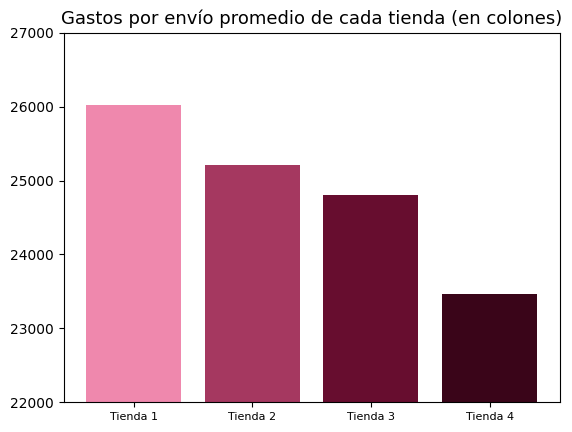

In [34]:
envioPromedio(listaTiendas, False)